<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/RandomForestClassifier/k_nearest_neighbours_classifier_melb_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>'Type': Loại nhà, ví dụ: 'h' (nhà riêng), 'u' (căn hộ), 't' (nhà liền kề).
<br>
Với đề tài của em là quyết định loại nhà, em có thể chọn các biến phụ thuộc sau:
<br>
1. 'Rooms': Số lượng phòng ngủ trong nhà.
<br>
2. 'Distance': Khoảng cách từ nhà đến trung tâm thành phố hoặc điểm quan trọng gần nhất.
<br>
3. 'Bathroom': Số lượng phòng tắm trong nhà.
<br>
4. 'Car': Số lượng chỗ đậu xe trong nhà.
<br>
5. 'Landsize': Diện tích đất.
<br>
6. 'BuildingArea': Diện tích xây dựng của nhà.
<br>
7. 'YearBuilt': Năm xây dựng nhà.</h3>

Import libraries 


In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

sns.set(style='darkgrid', font_scale=1.4)
from sklearn.model_selection import train_test_split
from scipy import stats
import time

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [102]:
import warnings

warnings.filterwarnings('ignore')

Import dataset


In [103]:
data = 'melb_data1.csv'

df = pd.read_csv(data)
df

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,Nelson,3/9/2016,13.5,3042,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,hockingstuart,3/9/2016,3.3,3206,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,Thomson,3/9/2016,3.3,3206,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,Brace,3/9/2016,6.4,3078,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,Jellis,3/9/2016,6.4,3078,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,West Footscray,32 Richelieu St,5,h,1030000,Village,30/07/2016,8.2,3012,2,2.0,352,NaN,NaN,Maribyrnong,-37.7908,144.8711,Western Metropolitan,5058
13576,West Footscray,121 Suffolk St,3,h,878000,Village,30/07/2016,8.2,3012,1,1.0,397,127.0,1960.0,Maribyrnong,-37.7901,144.8682,Western Metropolitan,5058
13577,Albion,3 Barclay St,2,h,460000,Barry,30/07/2016,13.9,3020,1,2.0,463,85.0,NaN,Brimbank,-37.7813,144.8234,Western Metropolitan,2185
13578,Albion,5/25 Ridley St,2,u,190000,Burnham,30/07/2016,13.9,3020,1,1.0,0,NaN,NaN,Brimbank,-37.7839,144.8239,Western Metropolitan,2185


Phân tích dữ liệu

In [104]:
# view dimensions of dataset

df.shape

(13580, 19)

Chúng ta có thể thấy rằng có 13580 trường hợp và 19 biến trong tập dữ liệu.

Cắt những dữ liệu cần thiết
'Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt'

In [107]:
selected_columns = ['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt']
df = df[selected_columns]

In [108]:
df.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,t,3,13.5,2,1.0,303,225.0,2016.0
1,h,2,3.3,1,0.0,120,82.0,1900.0
2,h,2,3.3,1,0.0,159,NaN,NaN
3,h,4,6.4,2,4.0,853,263.0,1930.0
4,h,3,6.4,2,2.0,208,NaN,2013.0


Xem tóm tắt tập dữ liệu

In [109]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Distance      13580 non-null  float64
 3   Bathroom      13580 non-null  int64  
 4   Car           13518 non-null  float64
 5   Landsize      13580 non-null  int64  
 6   BuildingArea  7130 non-null   float64
 7   YearBuilt     8205 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 848.9+ KB


In [110]:
for var in df.columns:
    
    print(df[var].value_counts())

h    9449
u    3017
t    1114
Name: Type, dtype: int64
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64
11.2    739
9.2     367
13.9    324
7.8     306
4.6     263
       ... 
16.6      1
43.3      1
37.5      1
45.2      1
35.5      1
Name: Distance, Length: 202, dtype: int64
1    7512
2    4974
3     917
4     106
0      34
5      28
6       5
7       2
8       2
Name: Bathroom, dtype: int64
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64
0       1939
650      103
697       71
700       48
585       47
        ... 
1334       1
1197       1
1022       1
34         1
1357       1
Name: Landsize, Length: 1448, dtype: int64
120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
103.60      1
63.70       1
106.76      1
39.50       1
357.00      1
Name: BuildingArea, 

In [111]:
df.dtypes

Type             object
Rooms             int64
Distance        float64
Bathroom          int64
Car             float64
Landsize          int64
BuildingArea    float64
YearBuilt       float64
dtype: object

In [112]:
# check missing values in variables

df.isnull().sum()

Type               0
Rooms              0
Distance           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
dtype: int64

In [113]:
df.isna().sum()

Type               0
Rooms              0
Distance           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
dtype: int64

Ngoại lệ trong các biến số

In [118]:
print(round(df.describe(),2))

          Rooms  Distance  Bathroom       Car   Landsize  BuildingArea  \
count  13580.00  13580.00  13580.00  13518.00   13580.00       7130.00   
mean       2.94     10.14      1.53      1.61     558.42        151.97   
std        0.96      5.87      0.69      0.96    3990.67        541.01   
min        1.00      0.00      0.00      0.00       0.00          0.00   
25%        2.00      6.10      1.00      1.00     177.00         93.00   
50%        3.00      9.20      1.00      2.00     440.00        126.00   
75%        3.00     13.00      2.00      2.00     651.00        174.00   
max       10.00     48.10      8.00     10.00  433014.00      44515.00   

       YearBuilt  
count    8205.00  
mean     1964.68  
std        37.27  
min      1196.00  
25%      1940.00  
50%      1970.00  
75%      1999.00  
max      2018.00  


In [123]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [131]:
# import category encoders
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.5 MB/s eta 0:00:00


In [132]:
encoder = ce.OrdinalEncoder(cols=['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Type'])

In [133]:
df= encoder.fit_transform(df)

thuật toán kNN mạnh mẽ đối với các ngoại lệ.

In [134]:
# view percentage of frequency distribution of values in `Class` variable

df['Type'].value_counts()/np.float(len(df))

2    0.695803
3    0.222165
1    0.082032
Name: Type, dtype: float64

In [135]:
print(round(df.describe(),2))

           Type     Rooms  Distance  Bathroom       Car  Landsize  \
count  13580.00  13580.00  13580.00  13580.00  13580.00  13580.00   
mean       2.14      2.03     56.58      1.74      2.77    397.54   
std        0.53      1.17     45.05      0.69      1.76    339.83   
min        1.00      1.00      1.00      1.00      1.00      1.00   
25%        2.00      1.00     18.00      1.00      1.00    101.00   
50%        2.00      2.00     46.00      2.00      3.00    336.00   
75%        2.00      3.00     82.00      2.00      4.00    620.00   
max        3.00      9.00    202.00      9.00     12.00   1448.00   

       BuildingArea  YearBuilt  
count      13580.00   13580.00  
mean         360.14      71.83  
std          244.60      61.74  
min            1.00       1.00  
25%          115.00      13.00  
50%          369.50      39.00  
75%          603.00     145.00  
max          603.00     145.00  


**Trực quan hóa dữ liệu**

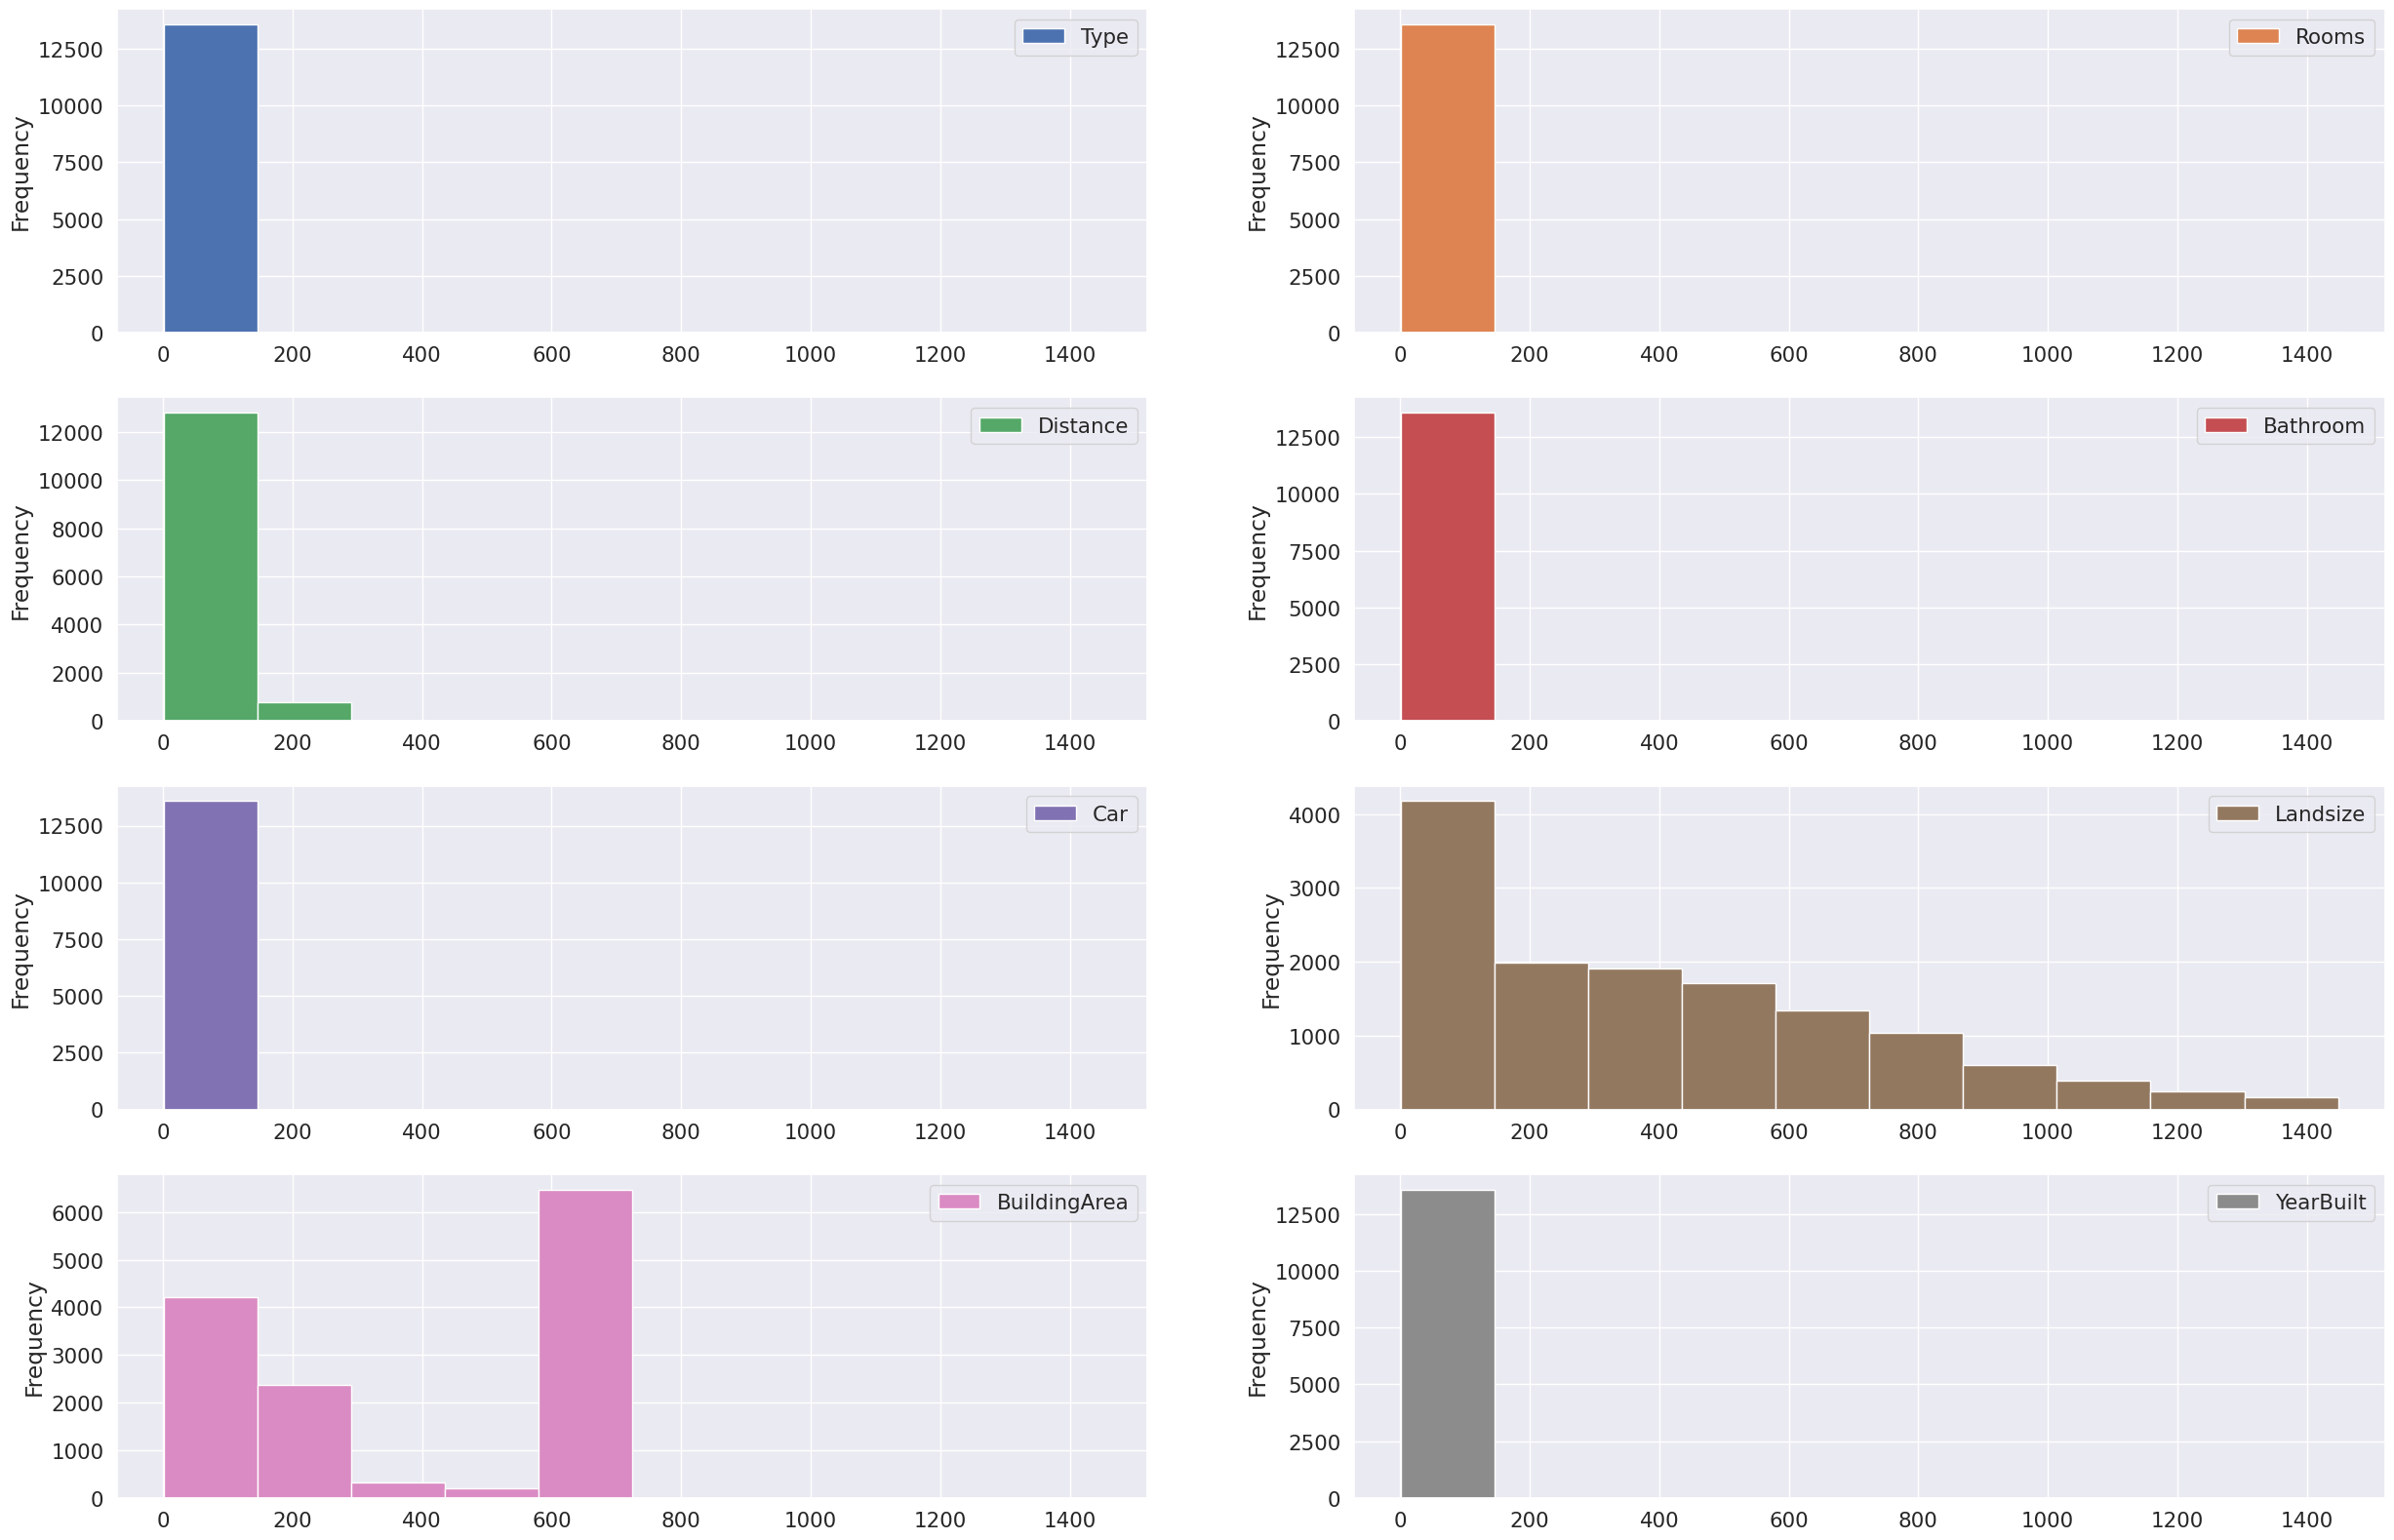

In [136]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

Ước lượng các hệ số tương quan

Tập dữ liệu của chúng tôi rất nhỏ. Vì vậy, chúng ta có thể tính toán hệ số tương quan tiêu chuẩn (còn gọi là Pearson's r) giữa mọi cặp thuộc tính. Chúng ta có thể tính toán nó bằng phương thức df.corr() như sau: -

In [137]:
correlation = df.corr()

In [138]:
correlation['Type'].sort_values(ascending=False)

Type            1.000000
Rooms           0.210862
Bathroom        0.117930
BuildingArea    0.022485
Distance       -0.019665
YearBuilt      -0.043944
Landsize       -0.141179
Car            -0.270527
Name: Type, dtype: float64

**Heat Map**

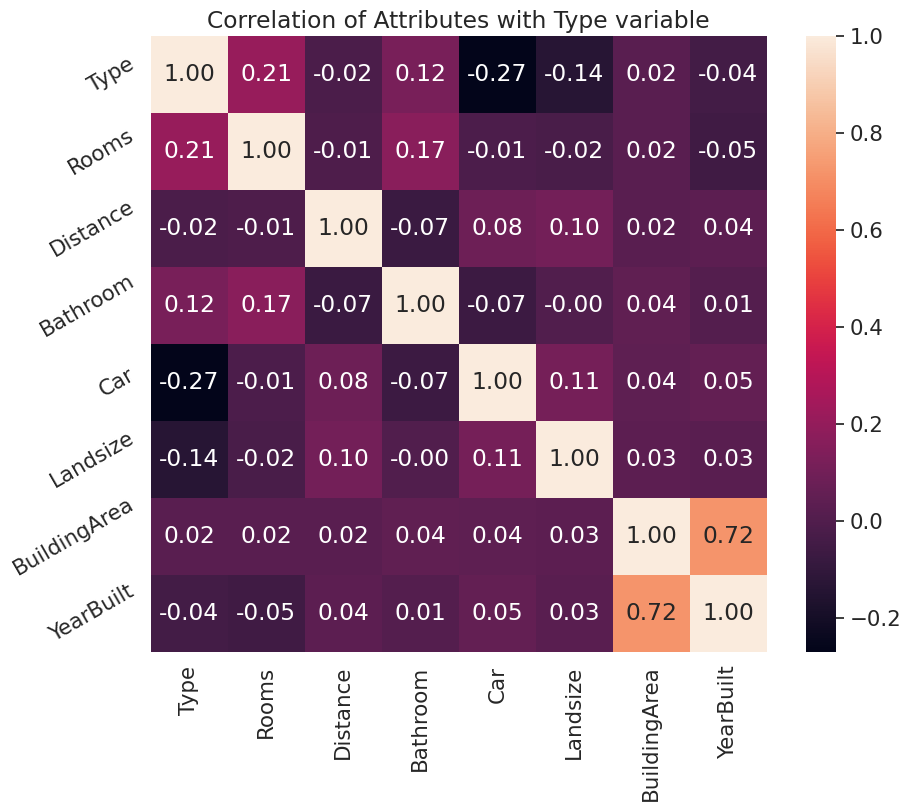

In [139]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Type variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

**Declare feature vector and target variable**

In [140]:
X = df.drop(['Type'], axis=1)

y = df['Type']

**Tách dữ liệu thành tập huấn luyện và kiểm tra riêng biệt**

In [141]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [142]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9098, 7), (4482, 7))

**Feature Engineering**

In [143]:
# check data types in X_train

X_train.dtypes

Rooms           int64
Distance        int64
Bathroom        int64
Car             int64
Landsize        int64
BuildingArea    int64
YearBuilt       int64
dtype: object

Kỹ thuật thiếu giá trị trong các biến


In [144]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [145]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [146]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

iả thiết

Tôi cho rằng dữ liệu bị thiếu hoàn toàn ngẫu nhiên (MCAR). Có hai phương pháp có thể được sử dụng để quy các giá trị còn thiếu. Một là quy nạp trung bình hoặc trung vị và một là quy nạp mẫu ngẫu nhiên. Khi có các giá trị ngoại lệ trong tập dữ liệu, chúng ta nên sử dụng phương pháp quy nạp trung bình. Vì vậy, tôi sẽ sử dụng phương pháp quy ước trung vị vì quy ước trung bình rất mạnh đối với các giá trị ngoại lai.

Tôi sẽ gán các giá trị còn thiếu bằng các biện pháp thống kê thích hợp của dữ liệu, trong trường hợp này là trung vị. Việc quy nạp nên được thực hiện trên tập huấn luyện, sau đó được truyền sang tập kiểm tra. Điều đó có nghĩa là các biện pháp thống kê được sử dụng để lấp đầy các giá trị còn thiếu cả trong tập huấn luyện và tập kiểm tra, chỉ nên được trích xuất từ ​​​​tập huấn luyện. Điều này là để tránh trang bị quá mức.

In [147]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [148]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [149]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [150]:
X_train.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
12520,1,60,2,4,281,603,28
6371,1,15,1,4,349,27,14
12339,2,82,2,1,9,603,145
5625,2,49,2,1,9,167,45
9223,1,20,1,1,431,603,145


In [151]:
X_test.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
8505,5,2,2,1,9,45,7
5523,3,67,1,4,9,603,145
12852,2,2,2,1,54,603,145
4818,3,40,1,4,890,603,145
12812,1,65,2,1,39,603,145


Bây giờ chúng tôi đã có bộ đào tạo và thử nghiệm sẵn sàng để xây dựng mô hình. Trước đó, chúng ta nên ánh xạ tất cả các biến đặc trưng trên cùng một tỷ lệ. Nó được gọi là nhân rộng tính năng. Tôi sẽ làm như sau.

**Feature Scaling**

In [152]:
cols = X_train.columns

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [154]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [155]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [156]:
X_train.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-0.878733,0.080930,0.381814,0.708765,-0.343442,0.991210,-0.715899
1,-0.878733,-0.922445,-1.061371,0.708765,-0.142974,-1.365522,-0.942305
2,-0.024688,0.571468,0.381814,-1.006676,-1.145312,0.991210,1.176208
3,-0.024688,-0.164340,0.381814,-1.006676,-1.145312,-0.792705,-0.440977
4,-0.878733,-0.810959,-1.061371,-1.006676,0.098766,0.991210,1.176208


Bây giờ chúng ta đã có bộ dữ liệu X_train sẵn sàng để đưa vào bộ phân loại Hồi quy logistic. Em sẽ làm như sau.

**Fit K Neighbors Classifier để đào tạo**

In [157]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predict test-set results**

In [158]:
y_pred = knn.predict(X_test)

y_pred

array([3, 2, 3, ..., 2, 2, 2])

**phương pháp dự đoán_proba**

Predict_proba đưa ra xác suất cho biến mục tiêu (2 và 4) trong trường hợp này, ở dạng mảng.

2 là xác suất ung thư lành tính và 4 là xác suất ung thư ác tính.

In [159]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

**Kiểm tra điểm chính xác**

In [160]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7762


Ở đây, y_test là nhãn lớp thực và y_pred là nhãn lớp dự đoán trong tập kiểm tra.

So sánh độ chính xác của tập huấn luyện và tập kiểm tra

Bây giờ, em sẽ so sánh độ chính xác của tập huấn luyện và tập kiểm tra để kiểm tra xem có trang bị quá mức không.

In [161]:
y_pred_train = knn.predict(X_train)

In [162]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8672


**Check for overfitting and underfitting**

In [163]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8672
Test set score: 0.7762


Điểm chính xác của tập huấn luyện là 0,8672 trong khi độ chính xác của tập kiểm tra là 0,7762. Hai giá trị này khá tương đương nhau. Vì vậy, không có câu hỏi về overfitting.

**Xây dựng lại mô hình phân loại kNN sử dụng các giá trị khác nhau của k**

Em đã xây dựng mô hình phân loại kNN bằng k=3. Bây giờ, tôi sẽ tăng giá trị của k và xem ảnh hưởng của nó đối với độ chính xác.

In [165]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.7956


In [166]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.7921


In [167]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.8003


In [168]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.8008


In [169]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.8021


**Confusion matrix**


Ma trận nhầm lẫn (confusion matrix) là một công cụ để tổng hợp hiệu suất của một thuật toán phân loại. Ma trận nhầm lẫn cung cấp cho chúng ta một cái nhìn rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi mà mô hình tạo ra. Nó cung cấp cho chúng ta một tóm tắt về các dự đoán đúng và sai lệch phân loại theo từng nhãn.

Có bốn loại kết quả có thể xảy ra trong quá trình đánh giá hiệu suất của một mô hình phân loại. Bốn loại kết quả này được mô tả như sau:

True Positives (TP) - True Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát thực tế thuộc về lớp đó.

True Negatives (TN) - True Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định và quan sát thực tế cũng không thuộc về lớp đó.

False Positives (FP) - False Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định nhưng quan sát thực tế không thuộc về lớp đó. Loại lỗi này được gọi là lỗi Loại I.

False Negatives (FN) - False Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định nhưng quan sát thực tế thuộc về lớp đó. Đây là một loại lỗi rất nghiêm trọng và được gọi là lỗi Loại II.

Bốn kết quả này được tổng hợp trong một ma trận nhầm lẫn như dưới đây.

In [171]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  68  220   62]
 [ 214 2732  171]
 [  72  264  679]]

True Positives(TP) =  68

True Negatives(TN) =  2732

False Positives(FP) =  220

False Negatives(FN) =  214


In [172]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[  44  248   58]
 [  90 2856  171]
 [  30  298  687]]

True Positives(TP) =  44

True Negatives(TN) =  2856

False Positives(FP) =  248

False Negatives(FN) =  90


Vì vậy, mô hình Phân loại kNN với k=7 hiển thị các dự đoán chính xác hơn và ít lỗi hơn so với mô hình k=3. Do đó, chúng tôi đã cải thiện hiệu suất với k=7.

**Classification metrices**

Báo cáo phân loại là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị điểm chính xác, thu hồi, f1 và hỗ trợ cho mô hình. Tôi đã mô tả các thuật ngữ này sau.

Chúng tôi có thể in một báo cáo phân loại như sau: -

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           1       0.27      0.13      0.17       350
           2       0.84      0.92      0.88      3117
           3       0.75      0.68      0.71      1015

    accuracy                           0.80      4482
   macro avg       0.62      0.57      0.59      4482
weighted avg       0.77      0.80      0.78      4482



In [177]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [178]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8956


In [179]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1044


**Độ chính xác**

In [180]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.1507


**Recall**

Về mặt toán học, thu hồi có thể được đưa ra dưới dạng tỷ lệ TP trên (TP + FN).

In [181]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.3284


**True Positive Rate(Tỷ lệ tích cực thực sự)**

In [182]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.3284


**False Positive Rate(Tỷ lệ tích cực sai)**

In [183]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0799


**Specificity(đặc biệt)**

In [184]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9201


**Điều chỉnh mức ngưỡng phân loại**

In [185]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ]])

**Observations(Quan sát)**

In [187]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

array([0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ])

In [ ]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

In [188]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

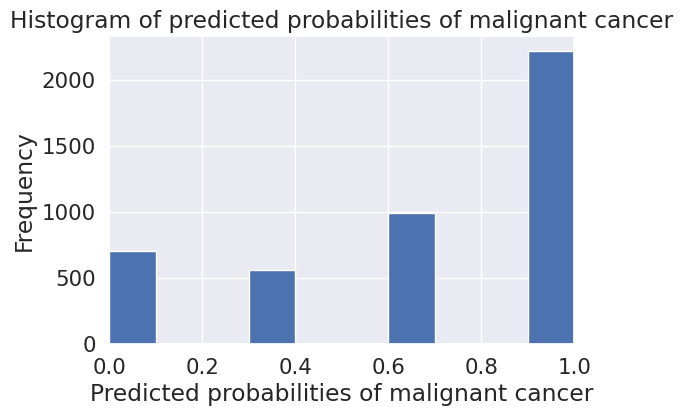

In [189]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')